In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [59]:
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')
wine = pd.concat([red_wine, white_wine])
wine.set_index(np.array(range(len(wine))), inplace = True)

In [22]:
model = PLSRegression()
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.583223710698


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B9EDBF240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA0446780>]], dtype=object)

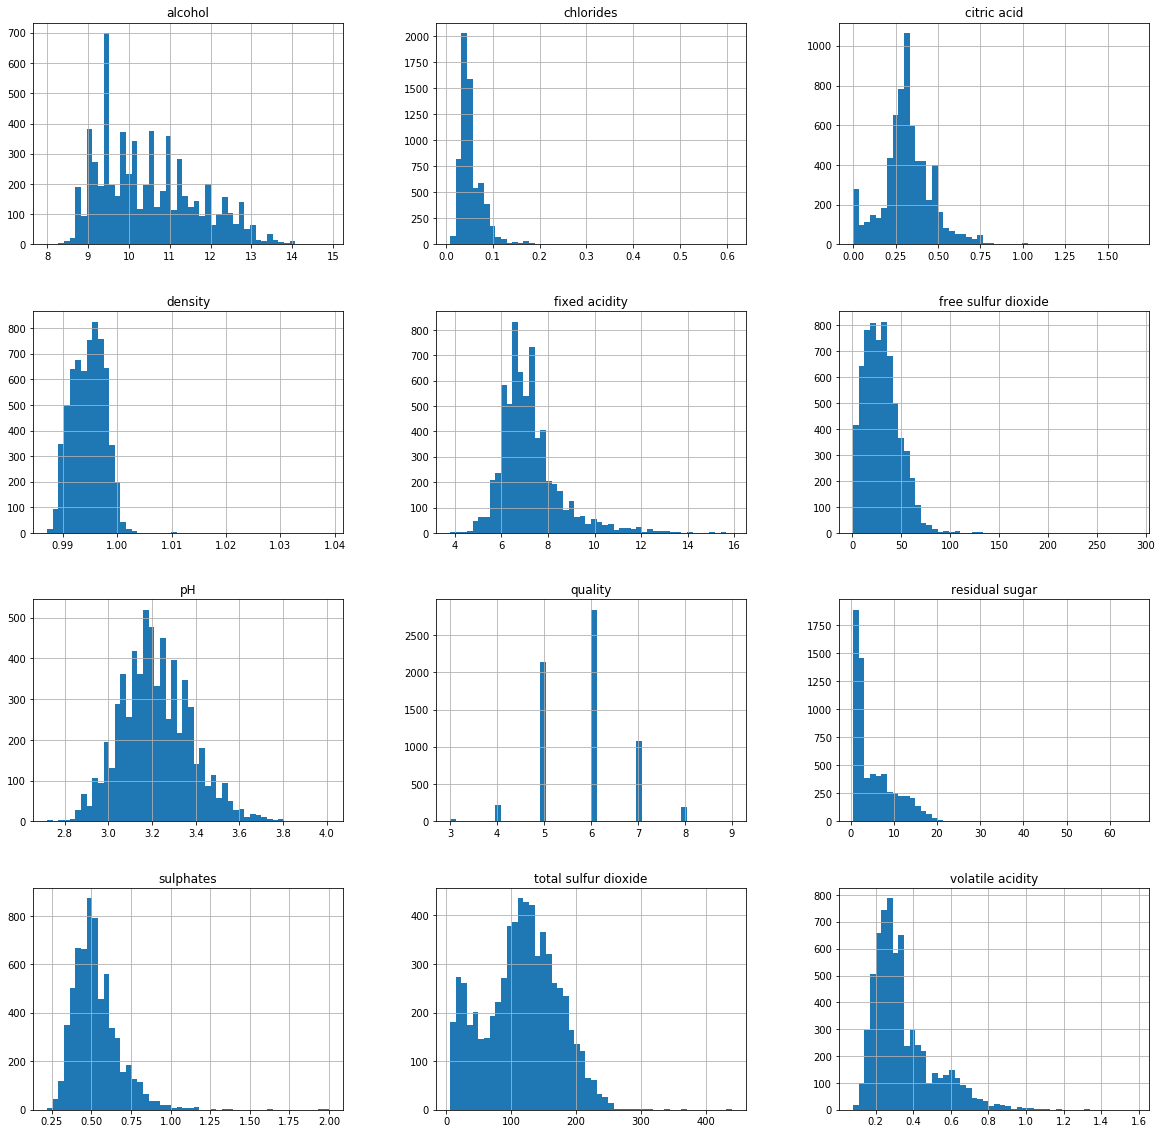

In [10]:
wine.hist(figsize=(20,20), bins=50)

In [12]:
skew0 = wine.skew()
skew0

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [60]:
test_data = wine.iloc[:,:-1].copy()

for i in test_data:
    test_data[i] = StandardScaler().fit_transform(test_data[i].values.reshape(-1,1))

test_data['quality'] = wine['quality']

outliers =[]

for i in range(len(test_data)):
    for j in test_data.iloc[i,:-1]:
        if j > 3 or j < -3:
            outliers.append(i)
            
outliers = pd.DataFrame(pd.Series(outliers).value_counts(), columns = ['count'])

for i in np.array(outliers.index):
    if outliers.loc[i].values < 1:
        outliers.drop(i, inplace=True)

print(len(outliers))
#print(test_data.loc[outliers.index])

488


In [61]:
wine.drop(outliers.index, inplace = True)

In [62]:
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())
skew0 = wine.skew()

-0.577092038752


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA05588D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA0C0A6A0>]], dtype=object)

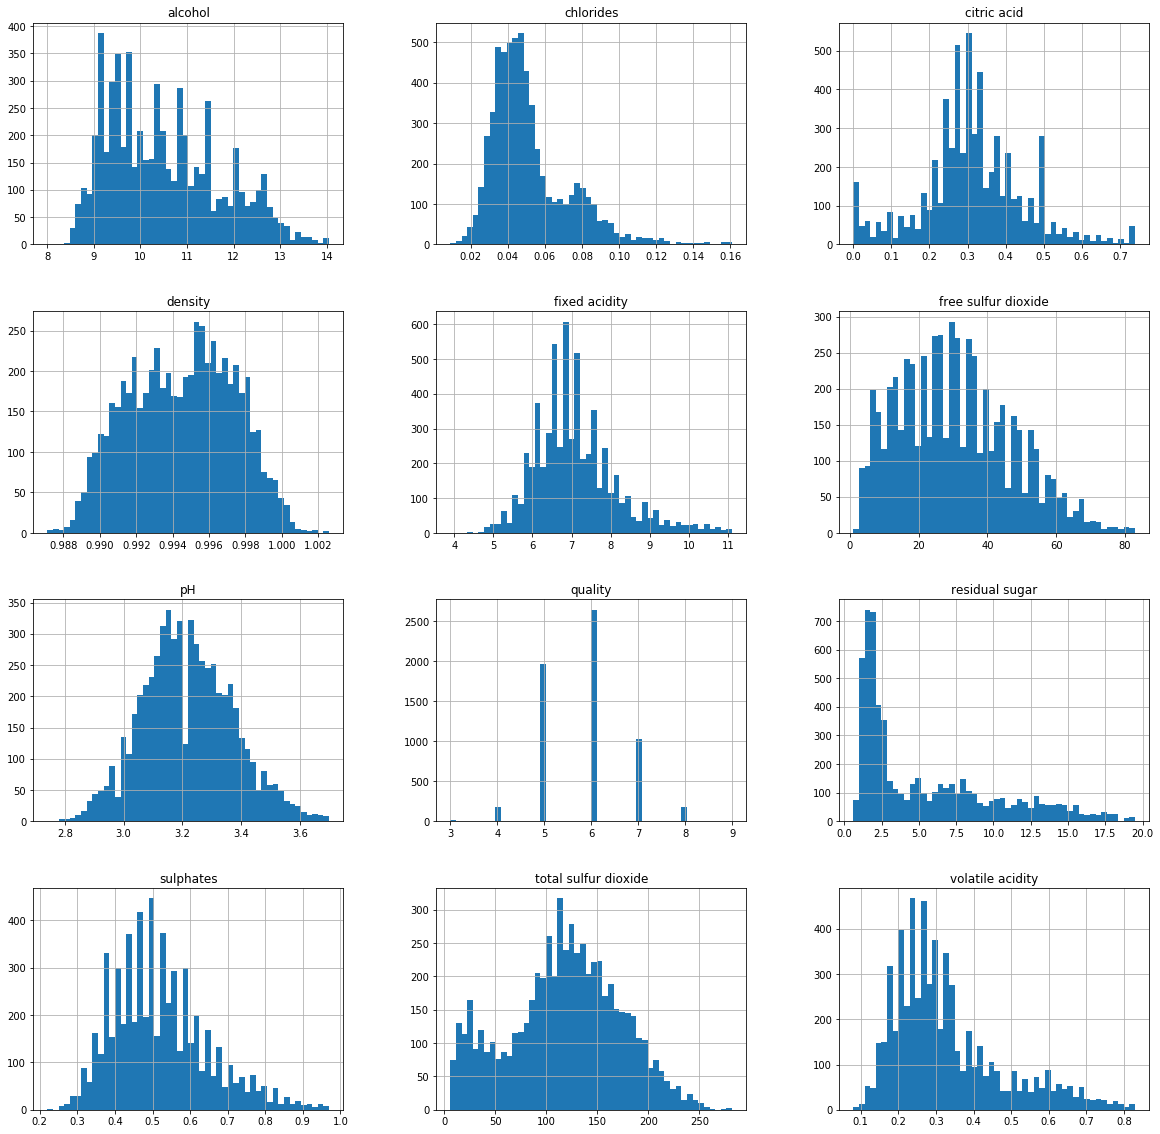

In [46]:
wine.hist(figsize=(20,20), bins=50)

In [63]:
for i in wine:
    if i in ['quality', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density']:
        print('pass')
        pass
    else:
        wine[i] = np.log1p(wine[i])

pass
pass
pass
pass
pass


In [64]:
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())
skew1 = wine.skew()
    

-0.5750468812


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA0CF2DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA2C6FA20>]], dtype=object)

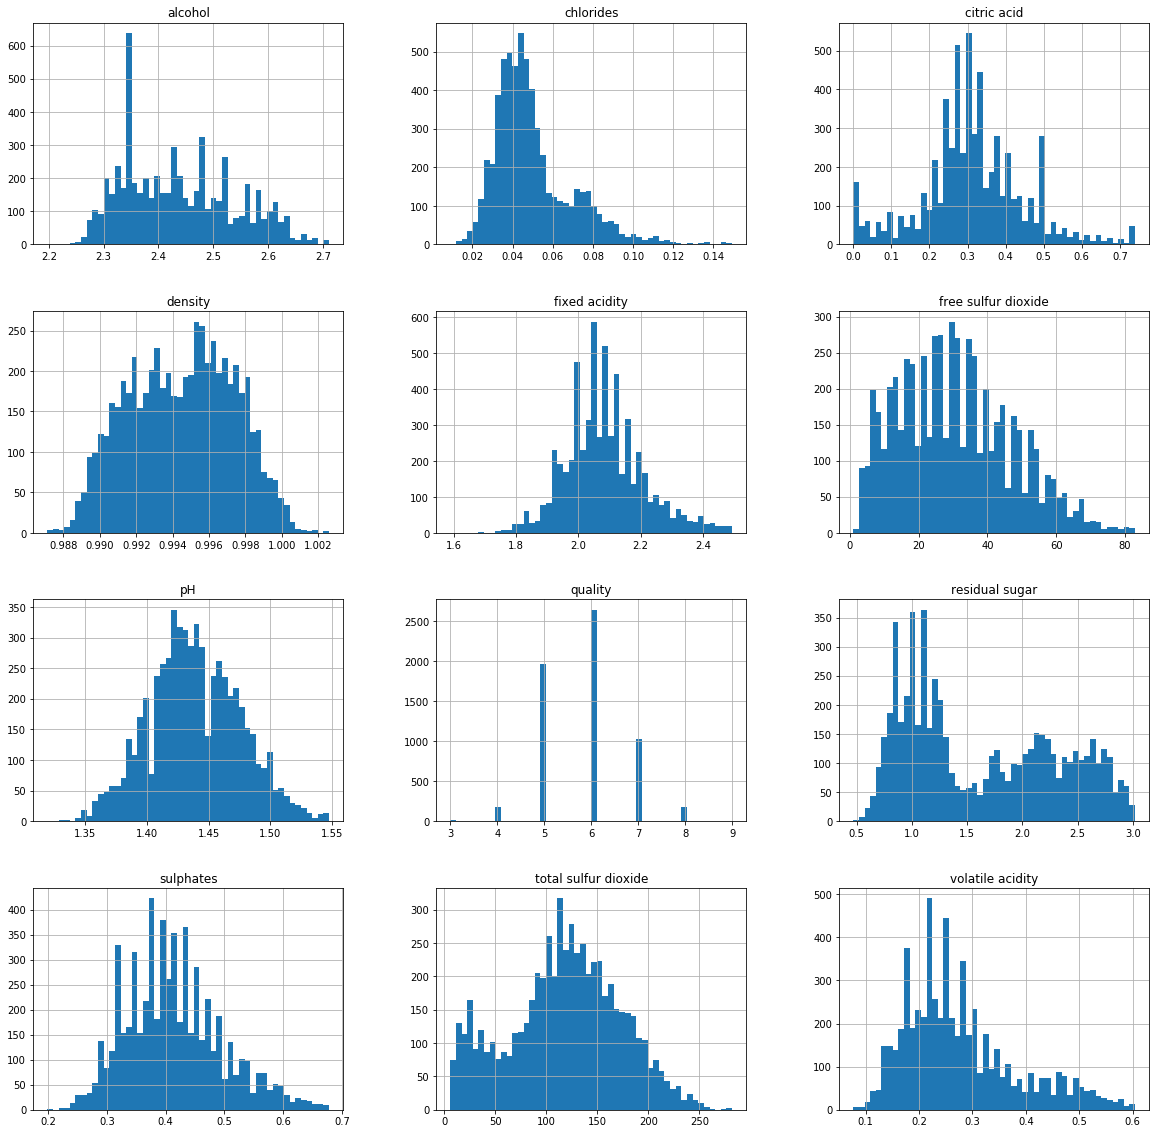

In [49]:
wine.hist(figsize=(20,20), bins=50)

In [51]:
abs(skew0) == abs(skew1)

fixed acidity           False
volatile acidity        False
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                      False
sulphates               False
alcohol                 False
quality                  True
dtype: bool

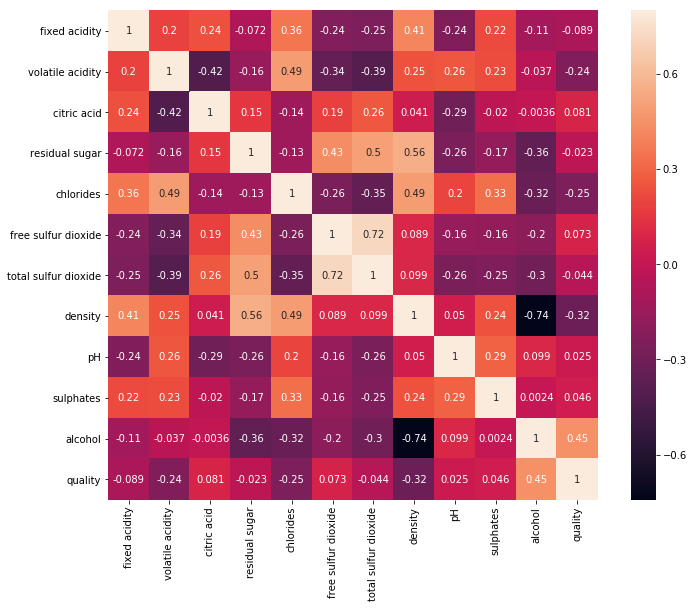

In [52]:
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [133]:
copy = wine.copy()

In [126]:
for i in wine:
    if i == 'quality':
        pass
    else:
        copy.drop(i, axis=1, inplace=True)
        for j in copy:
            copy = copy.copy()
            copy.drop(j, axis=1, inplace=True)
            score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
            print(i,j,score.mean())

fixed acidity volatile acidity -0.587366340868
fixed acidity citric acid -0.590300884342
fixed acidity residual sugar -0.596663911022
fixed acidity chlorides -0.606086073116
fixed acidity free sulfur dioxide -0.61113318845
fixed acidity total sulfur dioxide -0.615165093348
fixed acidity density -0.614105523874
fixed acidity pH -0.612547634294


ValueError: Invalid number of components: 2

In [152]:
copy = wine.copy()
copy.insert(5, 'sulfur ratio', copy['free sulfur dioxide'] / copy['total sulfur dioxide'])
copy.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())
sulfur_ratio = copy.copy()

-0.573294462608


In [138]:
for i in copy:
    if i == 'quality':
        pass
    else:
        copy = sulfur_ratio.copy()
        copy.drop(i, axis=1, inplace=True)
        score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
        print(i,score.mean())


fixed acidity -0.572560440456
volatile acidity -0.586191865061
citric acid -0.57146013354
residual sugar -0.582787295785
chlorides -0.573164209404
sulfur ratio -0.578342975571
density -0.574400105664
pH -0.574419825064
sulphates -0.579193727316
alcohol -0.602415578483


In [148]:
copy.drop(['citric acid'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.569114529948


In [153]:
copy.insert(5, 'acid ratio', copy['fixed acidity'] / copy['volatile acidity'] / copy['citric acid'])
copy.drop(['fixed acidity', 'volatile acidity', 'citric acid'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [125]:
copy.insert(5, 'density + sugar', copy['density'] + copy['residual sugar'])
copy.drop(['density', 'residual sugar'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())


-0.572547651


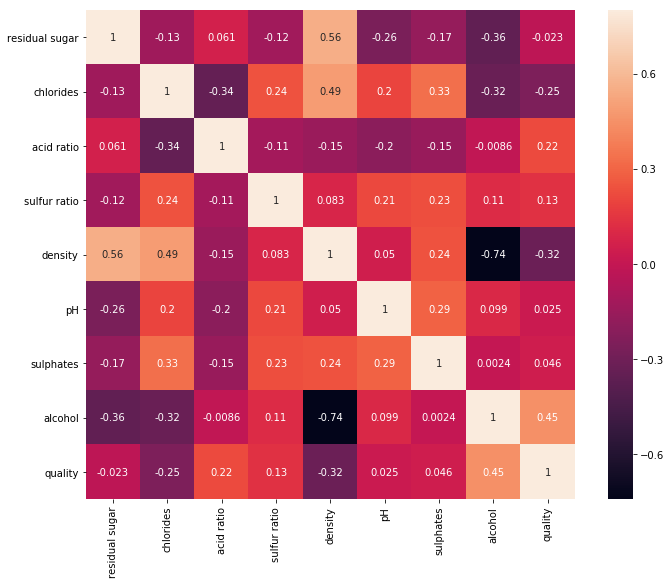

In [149]:
corrmat = copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);